<a href="https://colab.research.google.com/github/AnnaBo1/python_for_DA/blob/main/%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%963_Python_%2B_SQL_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 46.5 MB/s eta 0:00:00


2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [2]:
import mysql.connector
import datetime

In [3]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [4]:
cursor = con.cursor()

In [5]:
query = """
SELECT MAX(hire_date), MIN(hire_date)
FROM employees;
"""

In [6]:
cursor.execute(query) # Виконання запиту

In [7]:
cursor.fetchall() # Отримання результатів

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [8]:
import pandas as pd
import mysql.connector
import datetime

In [9]:
query = """
SELECT emp_no, salary, from_date, to_date
FROM salaries s1
WHERE to_date = (
    SELECT MAX(to_date)
    FROM salaries s2
    WHERE s1.emp_no = s2.emp_no
);
"""
#s1 це псевдонім для таблиці salaries, який дозволяє звертатися до неї у запиті
#WHERE to_date = ( — ця частина запиту визначає умову, за якою ми фільтруємо результати. Ми хочемо отримати тільки ті записи, для яких to_date (дата закінчення дії зарплати) є максимальною для кожного співробітника
#MAX(to_date): обчислює максимальну дату закінчення дії зарплати для співробітника
#FROM salaries s2: знову звертається до таблиці salaries, але під псевдонімом s2
#WHERE s1.emp_no = s2.emp_no: ця умова порівнює номер співробітника з основного запиту (s1) з номером співробітника в підзапиті (s2). Це дозволяє отримати максимальну дату тільки для конкретного співробітника

In [10]:
cursor.execute(query) # Виконуємо запит

In [11]:
data = cursor.fetchall()  # Отримання результатів

In [12]:
field_names = [i[0] for i in cursor.description] # Отримуємо назви колонок

In [13]:
res = pd.DataFrame(data, columns=field_names)    # Створення DataFrame

In [14]:
display(res.columns) # Назви колонок
display(res.shape)  # Розмір DataFrame
display(res.head(3))  # Перші 3 записи

Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')

(300180, 4)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [38]:
res['to_date'].dtype

dtype('O')

In [51]:
print(res['to_date'].dtype)

object


In [52]:
# Переведемо колонку to_date у формат рядків
res['to_date'] = res['to_date'].astype(str) #якщо не перетворити, кінцевий резульат покаже нуль.

In [53]:
# Перевіримо унікальні значення в колонці to_date, щоб побачити їх структуру
print(res['to_date'].unique())

['9999-01-01' '2000-07-31' '1996-11-09' ... '1986-07-18' '1988-05-03'
 '1987-08-25']


In [55]:
count = res[res['to_date'] == '9999-01-01'].shape[0] # Підрахунок кількості рядків з to_date рівним '9999-01-01'.
#shape[0]: Повертає кількість рядків, які відповідають умовам (з '9999-01-01' або без нього).Без шейп нам покаже просто таблицю

In [56]:
count_not = res[res['to_date'] != '9999-01-01'].shape[0] # Підрахунок кількості рядків з to_date, яке не дорівнює '9999-01-01'

In [57]:
print(f"Кількість значень to_date, рівних '9999-01-01': {count}")
print(f"Кількість значень to_date, які не дорівнюють '9999-01-01': {count_not }")

Кількість значень to_date, рівних '9999-01-01': 240124
Кількість значень to_date, які не дорівнюють '9999-01-01': 60056


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [59]:
import matplotlib.pyplot as plt

In [60]:
# Відфільтруємо співробітників, які досі працюють (to_date = '9999-01-01')
current_employees = res[res['to_date'] == '9999-01-01']

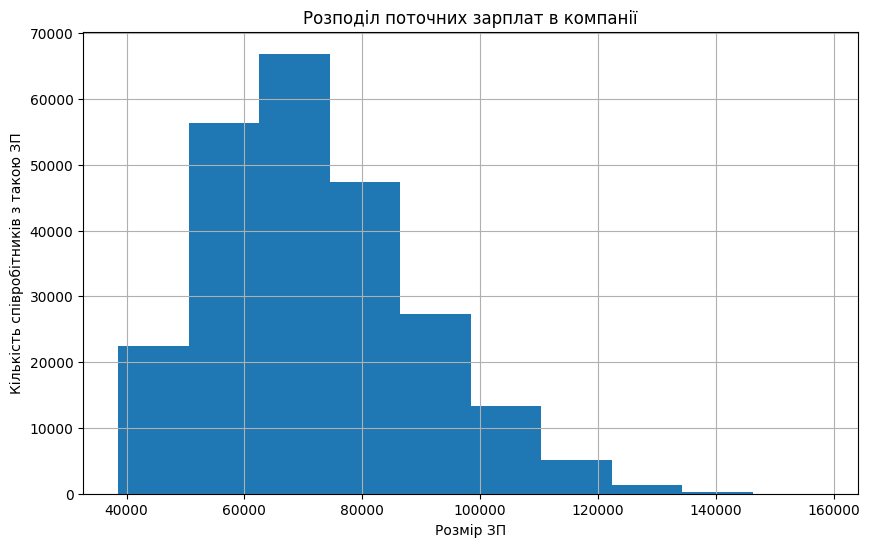

In [68]:
plt.figure(figsize=(10, 6))
plt.hist(current_employees['salary'], bins=10)

plt.title('Розподіл поточних зарплат в компанії')
plt.xlabel('Розмір ЗП')
plt.ylabel('Кількість співробітників з такою ЗП')

plt.grid(True)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [69]:
con.close()